In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


(256, 256, 3)


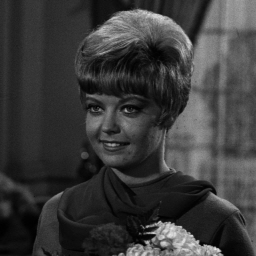

In [28]:
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/L.jpg')
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/rice.bmp')
img = cv2.imread('/content/drive/MyDrive/IP/CH04/g.jpg')
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/M.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg1)

In [16]:
outImg = np.zeros(gImg1.shape, dtype=np.uint8)

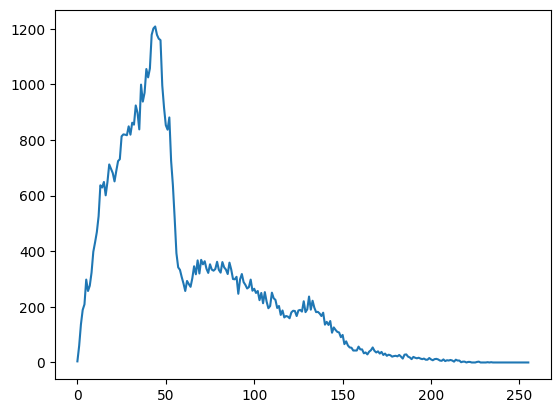

In [17]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 256])
plt.plot(hist)

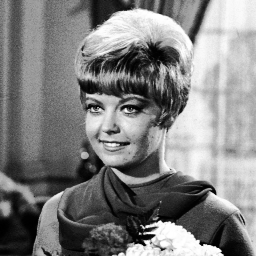

In [43]:
outImg = cv2.equalizeHist(gImg)
cv2_imshow (outImg)

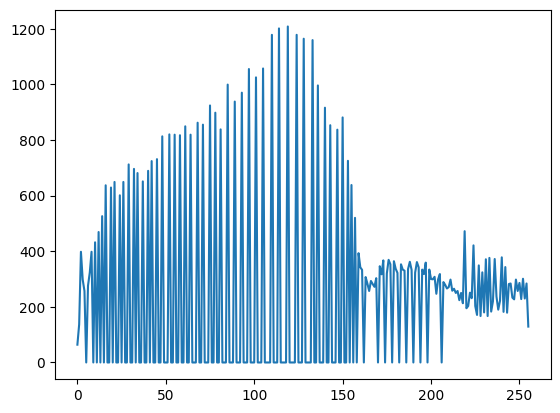

In [19]:
hist = cv2.calcHist([outImg], [0], None, [256], [0, 256])
plt.plot(hist)

In [50]:
myHist = np.zeros((256, 1), dtype=np.int32)

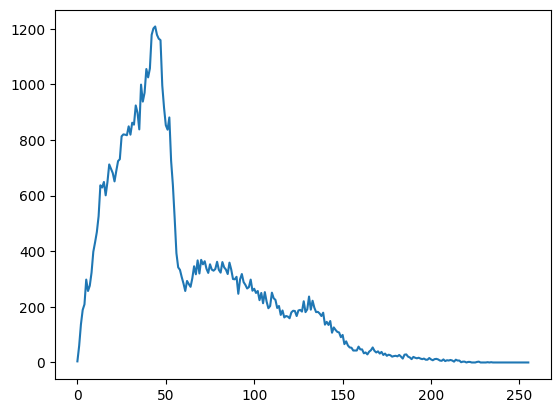

In [51]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    myHist[gImg[h, w]] += 1

plt.plot(myHist)

In [69]:
cumulHist = np.zeros((256, 1), dtype=np.int32)

히스토그램 만들기


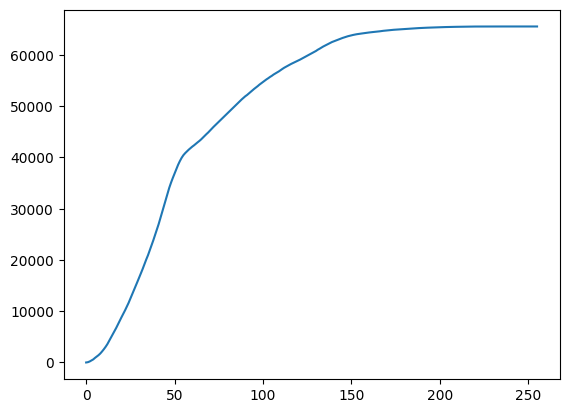

In [64]:
cumulHist[0] = myHist[0]
for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [65]:
equalHist = np.zeros((256, 1), dtype=np.uint8)

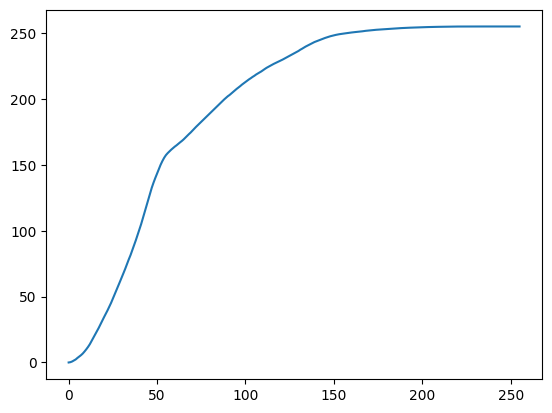

In [67]:
numOfPixel = gImg.shape[0] * gImg.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-2554490858.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outImg[h, w] = equalHist[gImg[h, w]]


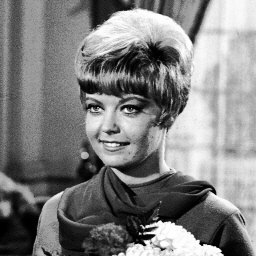

In [68]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    outImg[h, w] = equalHist[gImg[h, w]]

cv2_imshow(outImg)